In [0]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import random

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile
!wget --no-check-certificate \
    "ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip" \
    -O "/tmp/cell_images.zip"
local_zip = '/tmp/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

--2019-11-04 06:11:03--  ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip
           => ‘/tmp/cell_images.zip’
Resolving lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)... 130.14.55.35, 2607:f220:41e:7055::35
Connecting to lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)|130.14.55.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Open-Access-Datasets/Malaria ... done.
==> SIZE cell_images.zip ... 353452851
==> PASV ... done.    ==> RETR cell_images.zip ... done.
Length: 353452851 (337M) (unauthoritative)

cell_images.zip     100%[===================>] 337.08M  15.5MB/s    in 23s     

2019-11-04 06:11:31 (14.5 MB/s) - ‘/tmp/cell_images.zip’ saved [353452851]



In [0]:
print(len(os.listdir('/content/cell_images/Parasitized')))
print(len(os.listdir('/content/cell_images/Uninfected')))

13780
13780


In [0]:
try:
    os.mkdir('/malaria')
    os.mkdir('/malaria/training')
    os.mkdir('/malaria/testing')
    os.mkdir('/malaria/training/parasitized')
    os.mkdir('/malaria/training/uninfected')
    os.mkdir('/malaria/testing/parasitized')
    os.mkdir('/malaria/testing/uninfected')
except OSError:
    pass

In [0]:
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


PAR_SOURCE_DIR = "/content/cell_images/Parasitized/"
TRAINING_PAR_DIR = "/malaria/training/parasitized/"
TESTING_PAR_DIR = "/malaria/testing/parasitized/"
UNI_SOURCE_DIR = "/content/cell_images/Uninfected/"
TRAINING_UNI_DIR = "/malaria/training/uninfected/"
TESTING_UNI_DIR = "/malaria/testing/uninfected/"

split_size = .9
split_data(PAR_SOURCE_DIR, TRAINING_PAR_DIR, TESTING_PAR_DIR, split_size)
split_data(UNI_SOURCE_DIR, TRAINING_UNI_DIR, TESTING_UNI_DIR, split_size)

In [0]:
print(len(os.listdir('/malaria/training/parasitized')))
print(len(os.listdir('/malaria/training/uninfected')))
print(len(os.listdir('/malaria/testing/parasitized')))
print(len(os.listdir('/malaria/testing/uninfected')))

12402
12402
1378
1378


In [0]:
TRAINING_DIR = "/malaria/training/"

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/malaria/testing/"

validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 24802 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


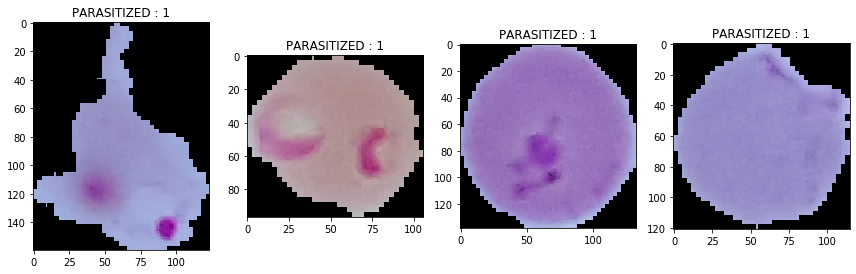

In [0]:
import cv2
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,12))
parasitized_data = os.listdir('/malaria/testing/parasitized/')
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/malaria/testing/parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()


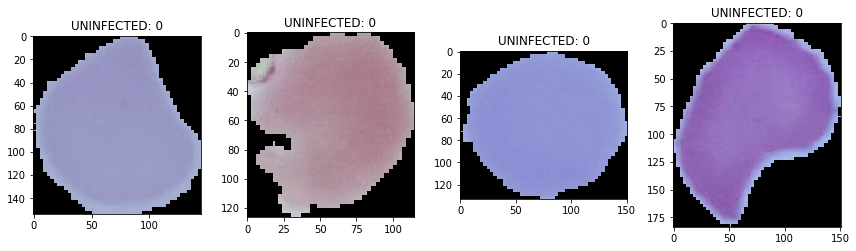

In [0]:
plt.figure(figsize = (12,12))
uninfected_data = os.listdir('/malaria/testing/uninfected/')
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/malaria/testing/uninfected' + "/" +uninfected_data[i])
    plt.imshow(img)
    plt.title('UNINFECTED: 0')
    plt.tight_layout()
plt.show()

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2019-11-04 06:11:48--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  35.7MB/s    in 2.3s    

2019-11-04 06:11:51 (35.7 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True



In [0]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
classifier = Sequential()


Using TensorFlow backend.


In [0]:
modelnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

modelnn.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
import numpy as np
history = modelnn.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 50,
            epochs = 50,
            validation_steps = 50,
            verbose=1,
            shuffle = False)


Epoch 1/50
50/50 [==============================] - 69s 1s/step - loss: 0.6876 - acc: 0.5314 - val_loss: 0.6279 - val_acc: 0.6638
Epoch 2/50
50/50 [==============================] - 63s 1s/step - loss: 0.5937 - acc: 0.6988 - val_loss: 0.4282 - val_acc: 0.8144
Epoch 3/50
50/50 [==============================] - 64s 1s/step - loss: 0.3759 - acc: 0.8442 - val_loss: 0.3424 - val_acc: 0.8684
Epoch 4/50
50/50 [==============================] - 64s 1s/step - loss: 0.3596 - acc: 0.8502 - val_loss: 0.3255 - val_acc: 0.8812
Epoch 5/50
50/50 [==============================] - 63s 1s/step - loss: 0.3333 - acc: 0.8698 - val_loss: 0.3462 - val_acc: 0.8686
Epoch 6/50
50/50 [==============================] - 64s 1s/step - loss: 0.3191 - acc: 0.8798 - val_loss: 0.3049 - val_acc: 0.8830
Epoch 7/50
50/50 [==============================] - 63s 1s/step - loss: 0.3049 - acc: 0.8846 - val_loss: 0.3052 - val_acc: 0.8860
Epoch 8/50
50/50 [==============================] - 63s 1s/step - loss: 0.3013 - acc: 0.88

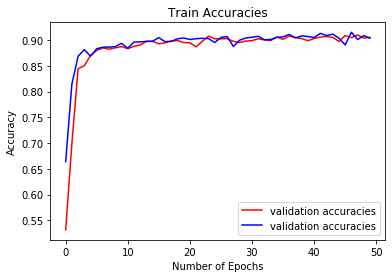

In [0]:

plt.plot(history.history['acc'], color='r', label="validation accuracies")
plt.plot(history.history['val_acc'], color='b', label="validation accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()  

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______

In [0]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [0]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        


In [0]:
callbacks = myCallback()
history_transfer = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 40,
            epochs = 40,
            validation_steps = 40,
            verbose = 1,
            callbacks=[callbacks])

Epoch 1/40
40/40 [==============================] - 61s 2s/step - loss: 0.5157 - acc: 0.7828 - val_loss: 0.6354 - val_acc: 0.7644
Epoch 2/40
40/40 [==============================] - 51s 1s/step - loss: 0.3519 - acc: 0.8567 - val_loss: 0.4004 - val_acc: 0.8514
Epoch 3/40
40/40 [==============================] - 52s 1s/step - loss: 0.3302 - acc: 0.8625 - val_loss: 0.4288 - val_acc: 0.8418
Epoch 4/40
40/40 [==============================] - 51s 1s/step - loss: 0.3108 - acc: 0.8730 - val_loss: 0.8541 - val_acc: 0.7404
Epoch 5/40
40/40 [==============================] - 51s 1s/step - loss: 0.2999 - acc: 0.8855 - val_loss: 0.7587 - val_acc: 0.7770
Epoch 6/40
40/40 [==============================] - 51s 1s/step - loss: 0.2727 - acc: 0.8938 - val_loss: 0.8575 - val_acc: 0.7712
Epoch 7/40
40/40 [==============================] - 53s 1s/step - loss: 0.3062 - acc: 0.8801 - val_loss: 1.9071 - val_acc: 0.6261
Epoch 8/40
40/40 [==============================] - 52s 1s/step - loss: 0.2787 - acc: 0.88

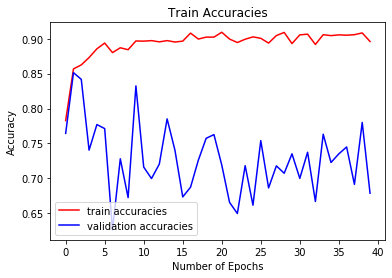

In [0]:
plt.plot(history_transfer.history['acc'], color='r', label="train accuracies")
plt.plot(history_transfer.history['val_acc'], color='b', label="validation accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()